## Четвертая лабораторная работа по ПП

In [ ]:
import main 
import pandas as pd
from matplotlib import pyplot as plt

## Первый и второй пункты
1. С использованием средств библиотеки Pandas прочитать все данные (в DataFrame будет несколько столбцов, в зависимости от варианта, например, у варианта 10 - Количество звезд, Текст рецензии).
2. Произвести именование колонок сформированного DataFrame в соответствии с рекомендациями, полученными на соответствующей лекции.

In [ ]:
columns = ['mark', 'text_of_comment', 'num_of_words']
    
dataset_path = main.GetDatasetPath()
dataframe = main.GetDataframe(dataset_path)
print(dataframe)

## Третий пункт
Произвести проверку на наличие невалидных значений в колонках (NaN, None и т.п.). В случае нахождения выполнить обработку таких значений.

In [ ]:
if(main.CheckNan(dataframe, columns[0])):
        print('Внутри датасета обнаружены и удалены значения Nan')
        dataframe.dropna() 

## Четвертый пункт
Добавить в DataFrame столбец, который будет содержать информацию о кол-ве слов в ячейке, содержащей текстовую информацию.

In [ ]:
count_word = main.CountWords(dataframe, columns[1])
dataframe[columns[2]] = pd.Series(count_word)
print(dataframe)

## Пятый пункт
С использованием Pandas вычислить статистическую информацию для столбцов, содержащих числовую информацию.

In [ ]:
stat = dataframe[columns[2]].describe()
print(stat)

## Шестой пункт
Написать функцию, которая на вход принимает DataFrame и количество слов, а возвращает отфильтрованный по количеству слов DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых значение в столбце с количеством слов ≤ заданного значения.

In [ ]:
df_words_filtered = pd.DataFrame(dataframe[dataframe[columns[2]] >= 10])

print(df_words_filtered)

## Седьмой пункт
Написать функцию, которая на вход принимает DataFrame и метку класса (например, Количество звезд), а возвращает отфильтрованный по заданной метке DataFrame.

In [ ]:
reviews_mark_1 = pd.DataFrame(dataframe[dataframe[columns[0]] == '1'])

    
print(reviews_mark_1)

## Восьмой пункт
Выполнить группировку DataFrame по метке класса с вычислением максимального, минимального и среднего значения по количеству слов.

In [ ]:
data = list()
for i in range(1,6):
    rewiews_words = pd.DataFrame(df_words_filtered[df_words_filtered[columns[0]] == str(i)])
    stat = main.StatInfo(rewiews_words, columns[2])
    print(f'\nДля оценки {i}:\n')
    print('Минимальное кол-во слов:', stat['min'])
    print('Максимальное кол-во слов:', stat['max'])
    print('Среднее кол-во слов:', stat['mean'])

In [ ]:
stat_1 = main.StatInfo(reviews_mark_1, columns[2])
print('\nДля оценки 1:\n')
print('Минимальное кол-во слов:', stat_1['min'])
print('Максимальное кол-во слов:', stat_1['max'])
print('Среднее кол-во слов:', stat_1['mean'])

## Девятый пункт
Написать функцию, которая на вход принимает DataFrame и метку класса, а возвращает гистограмму для слов. Для расчета гистограммы необходимо будет разбить блоки текста на слова и выполнить процедуру лемматизации для каждого слова .

In [ ]:
lemmatized_class = main.LemmalizeClass(dataframe, columns[1], '4')

## Десятый пункт
Выполнить визуализацию гистограммы, полученной из пункта 9, с помощью средств библиотеки matplotlib. Соответствующие оси, графики и значения необходимо подписать.

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

ax.bar(list(lemmatized_class.keys()), lemmatized_class.values(), color='g')

plt.show()

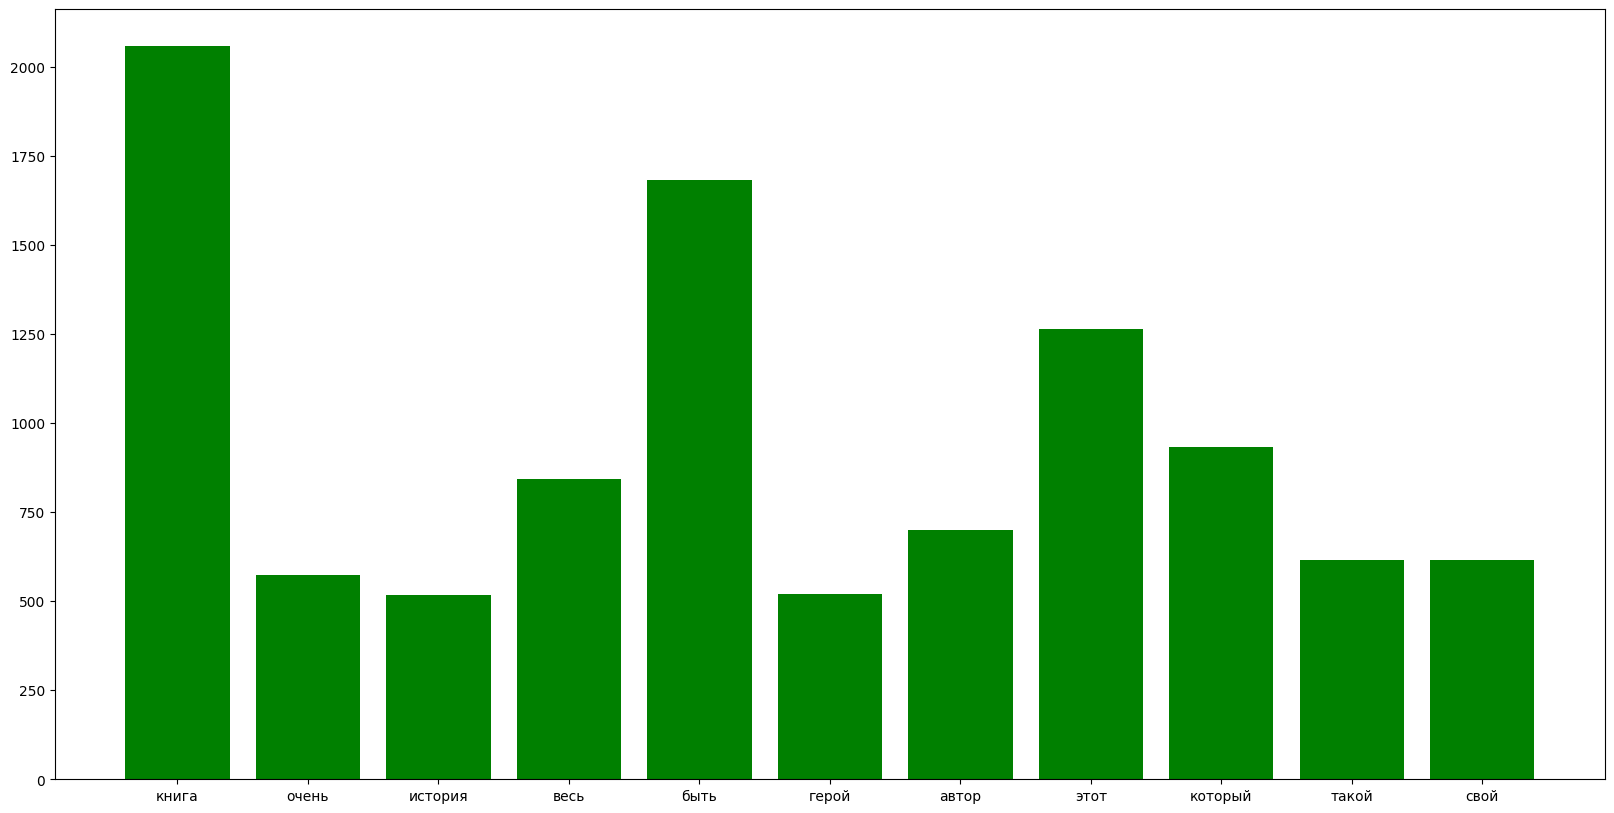